*Python: Random Forest*

En esta notebook se hace el analisis de la base de datos llamada "Milk Quality Prediction", disponible en: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality?resource=download. Esta es una base de datos  proveniente del famoso sitio web Kaggle. Esta base de datos consta de 1059 observaciones manuales donde se registra la siguiente informacion. 

1. pH. 
2. Temperatura
3. Sabor
4. Olor
5. Grasa
6. Turbidez
7. Color
8. Calidad

Tenemos que la Calidad es la variable objetivo. Es decir, queremos usar las 7 variables anteriores para predecir la calidad de la leche. Para resolver este problema, utilizaremos una tecnica de Machine Learning llamada Random Forest. A continuacion se da una breve explicacion (el lector puede omitirla y pasar directamente al codigo en Python).

*Breve explicacion del metodo Random Forest*

Sean $a_{1},...,a_{n}$ caracteristicas y sea $f$ un clasificador. Decimos que $f$ es un arbol de decision si y solo si para toda $i \in \{1,...,n\}$ existe una condicion sobre la caracteristica $i$ tal que $f(a_{1},...,a_{n}) \in \R$ y ademas dichas condiciones maximizan el "coeficiente de Gini". Es decir, la prediccion de $f$ esta dada por una serie de condiciones que maximizan un criterio de Gini (el cual no se explicara para no entrar en honduras). 

Ahora bien, sean $f_{1},...,f_{m}$ arboles de decision. Sea $g$ un clasificador. Decimos que $g$ es un random forest si y solo si cada uno de los arboles de decision $f_{i}$ tiene acceso a un subconjunto arbitrario del espacio muestral y un subconjunto propio de caracteristicas elegido arbitrariamente, y $g(a_{1},..,a_{n})$ es la prediccion mas votada de los $f_{1},...,f_{m}$. 

*Aplicacion del modelo*

Ahora pasamos a la aplicacion del modelo. Utilizamos metodos de la libreria sklearn. Primero cargamos los datos.

In [1]:
#Hacemos la carga de los datos y hacemos analisis exploratorio. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('milknew.csv')


Despues creamos los conjunto de entrenamiento y prueba. Usamos 70% de datos para entrenar el modelo.

In [2]:
#Hacemos la division de los datos 
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:7]
y = data.iloc[:, 7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

Inicializamos el clasificador y realizamos el ajuste con los datos de entrenamiento. 

In [3]:
#Implementacion de un bosque aleatorio
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = None, min_samples_split = 2)
fit_forest = random_forest.fit(X_train, y_train)

Ahora pasamos a hacer la predicciones sobre el conjunto de prueba. Recordemos que estos son datos que nunca ha visto el modelo. De esta manera podemos evaluar que tan bien puede realizar predicciones. 

In [4]:
#Vemos el score del modelo 

fit_forest.score(X_test, y_test)
fit_forest.estimators_[0].feature_importances_
y_pred = fit_forest.predict(X_test)

Una vez con la predicciones, pasamos a evaluar su rendimiento. Primero imprimimos la matriz de confusion. Recordemos que si $A$ es matriz de confusion, entonces $A_{ij}$ es la cantidad de observaciones fueron predichas en la categoria $j$ pero en realidad eran categoria $i$. En ese sentido la entrada $A_{ii}$ es la cantidad de predicciones de la categorias $i$ fueron correctamente predichas. 

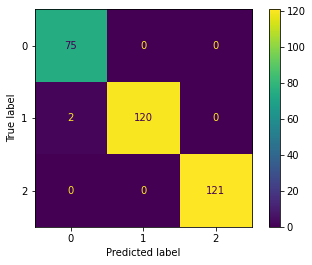

In [5]:
#Hacemos la impresion de la matriz de confusion. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Vemos que el modelo fue casi perfecto, solo 2 observaciones fueron incorrectas en los datos de prueba. Ahora bien, mostramos las metricas del modelo. Vemos que tamnbien son muy buenas y reflejan el hecho de que solo 2 observaciones fueron erroneas. 

In [6]:
#Mostramos las metricas del modelo
from sklearn.metrics import classification_report

reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

        high       0.97      1.00      0.99        75
         low       1.00      0.98      0.99       122
      medium       1.00      1.00      1.00       121

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318



Conclusion: Tenemos que el algoritmo de random forest fue muy bueno para este problema y podemos utilizar este modelo ya entrenado para predecir de manera automatica la calidad de la leche. Un clasificador como este podria reducir costos en la industria al realizar la clasificacion de manera automatica.  